In [1]:
from hlda import hLDA, draw_graph

In [2]:
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

# create sample documents
doc_a = "Batman became popular soon after his introduction and gained his own comic book title, Batman, in 1940."
doc_b = "In 1971, Trump moved to Manhattan, where he became involved in larger construction projects, and used attractive architectural design to win public recognition."
doc_c = "Batman is, in his everyday identity, Bruce Wayne, a wealthy American business magnate living in Gotham City."
doc_d = "In 2001, Trump completed Trump World Tower, a 72-story residential tower across from the United Nations Headquarters."
doc_e = " Unlike most superheroes, Batman does not possess any superpowers; rather, he relies on his genius intellect, physical prowess, martial arts abilities, detective skills, science and technology, vast wealth, intimidation, and indomitable will. "

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]

    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [8]:
h = hLDA(texts, 10, 0.01, 0.5, 1, 1000, 3)

/Users/jjc/Documents/python/hlda/hlda/util.py:15: RuntimeWarning: invalid value encountered in true_divide
  c_m = c_m_nume/c_m_deno[:, np.newaxis]


In [9]:
graph = draw_graph(h)

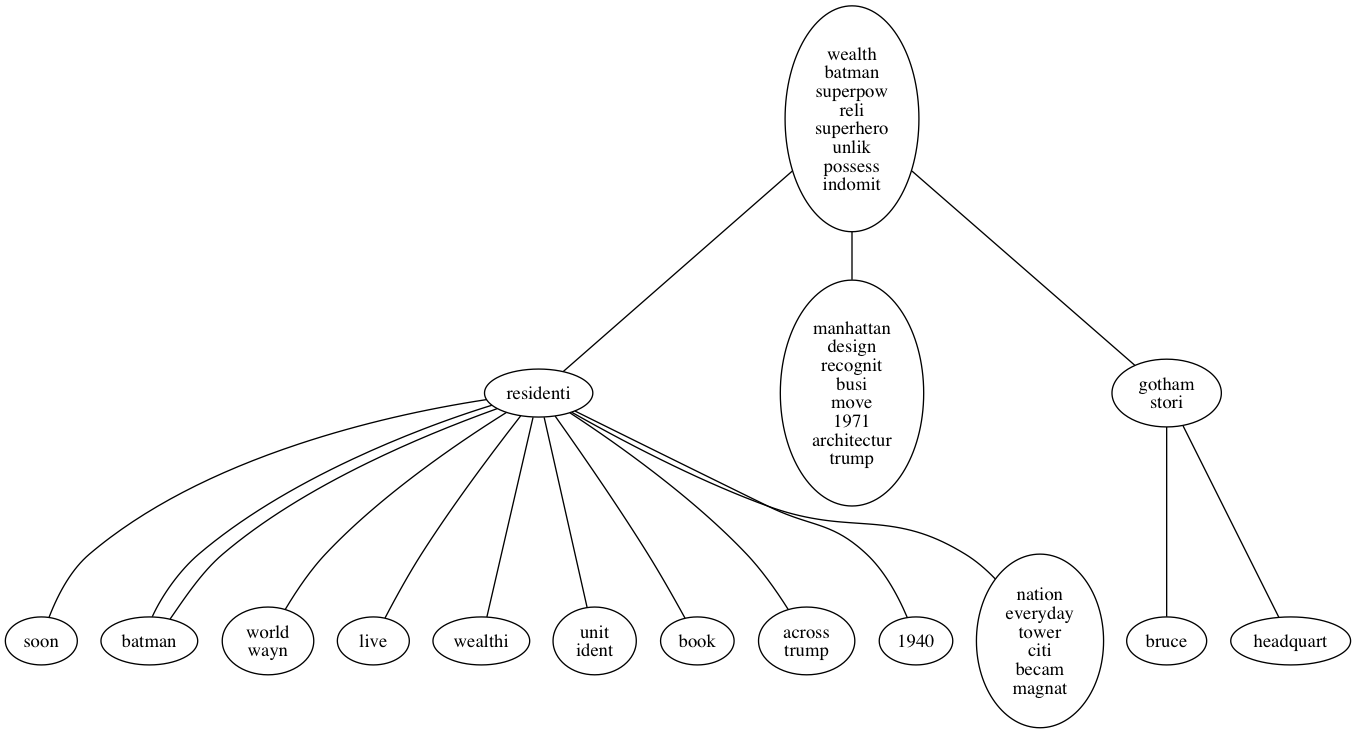

In [10]:
from IPython.display import Image, display
plt = Image(graph.create_png())
display(plt)

In [7]:
h

([[{(0, 1),
    (0, 2),
    (1, 1),
    (4, 1),
    (5, 1),
    (6, 1),
    (7, 1),
    (8, 1),
    (9, 1),
    (30, 1),
    (48, 1),
    (51, 1),
    (52, 1),
    (53, 1),
    (54, 1),
    (55, 1),
    (59, 1),
    (64, 1),
    (65, 1)}],
  [{(42, 1), (45, 1), (46, 1)}, {(11, 1), (23, 1), (49, 1)}],
  [{(43, 1)},
   {(18, 1)},
   {(22, 1)},
   {(28, 1), (37, 1)},
   {(39, 2)},
   {(20, 1), (24, 1), (33, 1), (36, 1), (38, 1), (44, 1)},
   {(40, 1), (41, 1)},
   {(11, 2), (13, 1)},
   {(14, 1)},
   {(10, 1), (15, 1), (16, 1), (19, 1)},
   {(21, 1)},
   {(0, 1),
    (1, 1),
    (2, 1),
    (3, 1),
    (12, 1),
    (26, 1),
    (27, 1),
    (29, 1),
    (31, 1),
    (32, 1),
    (34, 1),
    (35, 1),
    (47, 1),
    (50, 1),
    (56, 1),
    (57, 1),
    (58, 1),
    (60, 1),
    (61, 1),
    (62, 1),
    (63, 1),
    (67, 1),
    (68, 1)},
   {(25, 1), (66, 1)}]],
 [[1], [2], [11, 2]])